In [1]:

import pandas as pd
import os

# Assuming raw_data is the folder path containing the CSV file
file_name_kadar_air = "nir_basah_kadar_air_df.csv"  # Replace with the actual file name
file_path_kadar_air = os.path.join("./../curated_data_2", file_name_kadar_air)
data_kadar_air = pd.read_csv(file_path_kadar_air)
data_kadar_air.head()

# Assuming raw_data is the folder path containing the CSV file
file_name_gula_reduksi = "nir_basah_gula_reduksi_df.csv"  # Replace with the actual file name
file_path_gula_reduksi = os.path.join("./../curated_data_2", file_name_gula_reduksi)
data_gula_reduksi = pd.read_csv(file_path_gula_reduksi)
data_gula_reduksi.head()

# Assuming raw_data is the folder path containing the CSV file
file_name_lemak = "nir_basah_lemak_df.csv"  # Replace with the actual file name
file_path_lemak = os.path.join("./../curated_data_2", file_name_lemak)
data_lemak = pd.read_csv(file_path_lemak)
data_lemak.head()

# Assuming raw_data is the folder path containing the CSV file
file_name_protein = "nir_basah_protein_df.csv"  # Replace with the actual file name
file_path_protein = os.path.join("./../curated_data_2", file_name_protein)
data_protein = pd.read_csv(file_path_protein)

# Assuming raw_data is the folder path containing the CSV file
file_name_fenol = "nir_basah_fenol_df.csv"  # Replace with the actual file name
file_path_fenol = os.path.join("./../curated_data_2", file_name_fenol)
data_fenol = pd.read_csv(file_path_fenol)

In [2]:
data_kadar_air = data_kadar_air.drop(columns=['SAMPEL'])
data_gula_reduksi = data_gula_reduksi.drop(columns=['SAMPEL'])
data_lemak = data_lemak.drop(columns=['SAMPEL' ])
data_protein = data_protein.drop(columns=['SAMPEL' ])
data_fenol = data_fenol.drop(columns=['SAMPEL' ])

In [3]:
# Remove unwanted columns if they exist in any DataFrame in the notebook
cols_to_remove = ['abs_error', 'y_cv_pred','y_pred',"ABS_ERROR",'y_actual','y_pred_OOF','y_pred_full']

df_names = [
    'data_kadar_air', 'data_gula_reduksi', 'data_lemak',  
    'data_protein', 'data_fenol',
]

for name in df_names:
    if name in globals():
        obj = globals()[name]
        if isinstance(obj, pd.DataFrame):
            # drop columns if present, ignore otherwise
            obj.drop(columns=cols_to_remove, inplace=True, errors='ignore')
            globals()[name] = obj

In [4]:
import sys
sys.path.append('./../tools')
from split_data import datasplit_simple

# Contoh penggunaan fungsi datasplit_simple
# Misalnya, jika fungsi ini memerlukan parameter seperti data dan rasio split
test_data_kadar_air,train_data_kadar_air= datasplit_simple(data_kadar_air, cs=0.2)
test_data_gula_reduksi,train_data_gula_reduksi= datasplit_simple(data_gula_reduksi, cs=0.2)
test_data_lemak,train_data_lemak= datasplit_simple(data_lemak, cs=0.2)
test_data_protein,train_data_protein= datasplit_simple(data_protein, cs=0.2)
test_data_fenol,train_data_fenol= datasplit_simple(data_fenol, cs=0.2)

Data has been separated!
Data has been separated!
Data has been separated!
Data has been separated!
Data has been separated!


In [5]:
# Baca data dari file Wavelenght_NIR.csv
wavelength_data = pd.read_csv('../raw_data/Wavelenght_NIR.csv', header=None)
wavelength_data = wavelength_data.iloc[:train_data_protein.shape[1], :]  # Potong wavelength_data jika perlu

# Tambahkan kolom 'Gula Reduksi' jika belum ada
if wavelength_data.iloc[0, 0] != 'Gula Reduksi':
    wavelength_data = pd.concat([pd.DataFrame(['Gula Reduksi']), wavelength_data], ignore_index=True)
train_data_gula_reduksi_df = pd.DataFrame(train_data_gula_reduksi, columns=wavelength_data[0])
test_data_gula_reduksi_df = pd.DataFrame(test_data_gula_reduksi, columns=wavelength_data[0])

wavelength_data = pd.read_csv('../raw_data/Wavelenght_NIR.csv', header=None)
wavelength_data = wavelength_data.iloc[:train_data_protein.shape[1], :]  # Potong wavelength_data jika perlu
# Tambahkan kolom '`KADAR AIR`' jika belum ada
if wavelength_data.iloc[0, 0] != 'Kadar Air':
    wavelength_data = pd.concat([pd.DataFrame(['Kadar Air']), wavelength_data], ignore_index=True)
train_data_kadar_air_df = pd.DataFrame(train_data_kadar_air, columns=wavelength_data[0])
test_data_kadar_air_df = pd.DataFrame(test_data_kadar_air, columns=wavelength_data[0])


wavelength_data = pd.read_csv('../raw_data/Wavelenght_NIR.csv', header=None)
wavelength_data = wavelength_data.iloc[:train_data_protein.shape[1], :]  # Potong wavelength_data jika perlu
# Tambahkan kolom 'LEMAK' jika belum ada
if wavelength_data.iloc[0, 0] != 'LEMAK':
    wavelength_data = pd.concat([pd.DataFrame(['LEMAK']), wavelength_data], ignore_index=True)
train_data_lemak_df = pd.DataFrame(train_data_lemak, columns=wavelength_data[0])
test_data_lemak_df = pd.DataFrame(test_data_lemak, columns=wavelength_data[0])


wavelength_data = pd.read_csv('../raw_data/Wavelenght_NIR.csv', header=None)
wavelength_data = wavelength_data.iloc[:train_data_protein.shape[1], :]  # Potong wavelength_data jika perlu
# Tambahkan kolom 'PROTEIN' jika belum ada
if wavelength_data.iloc[0, 0] != 'PROTEIN':
    wavelength_data = pd.concat([pd.DataFrame(['PROTEIN']), wavelength_data], ignore_index=True)
train_data_protein_df = pd.DataFrame(train_data_protein, columns=wavelength_data[0])
test_data_protein_df = pd.DataFrame(test_data_protein, columns=wavelength_data[0])

wavelength_data = pd.read_csv('../raw_data/Wavelenght_NIR.csv', header=None)
wavelength_data = wavelength_data.iloc[:train_data_protein.shape[1], :]  # Potong wavelength_data jika perlu
# Tambahkan kolom 'FENOL' jika belum ada
if wavelength_data.iloc[0, 0] != 'FENOL':
    wavelength_data = pd.concat([pd.DataFrame(['FENOL']), wavelength_data], ignore_index=True)
train_data_fenol_df = pd.DataFrame(train_data_fenol, columns=wavelength_data[0])
test_data_fenol_df = pd.DataFrame(test_data_fenol, columns=wavelength_data[0])

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.spatial.distance import mahalanobis

import matplotlib.pyplot as plt

def detect_outliers_pca_mahalanobis(df, label_col='PROTEIN', n_components=10, variance_threshold=0.95, outlier_percentile=90, plot=True):
    # Standarisasi data
    scaler = StandardScaler()
    X = df.drop(columns=[label_col])
    X_scaled = scaler.fit_transform(X)

    # Lakukan PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(X_scaled)

    # Variasi kumulatif
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_pc_95 = np.argmax(cumulative_variance >= variance_threshold) + 1

    # Ambil PC yang dibutuhkan
    pca_needed = pca_result[:, :num_pc_95]
    
    

    # Hitung mean dan covariance matrix
    mean_pca = np.mean(pca_needed, axis=0)
    cov_pca = np.cov(pca_needed, rowvar=False)

    if cov_pca.ndim == 0:
        cov_pca = np.array([[cov_pca]])
    elif cov_pca.ndim == 1:
        cov_pca = np.diag(cov_pca)

    inv_cov_pca = np.linalg.inv(cov_pca)

    # Hitung jarak Mahalanobis
    distances = np.array([mahalanobis(row, mean_pca, inv_cov_pca) for row in pca_needed])

    # Threshold untuk outlier
    threshold = np.percentile(distances, outlier_percentile)
    outliers = distances > threshold

    print(f"Jumlah PC untuk variasi ≥{int(variance_threshold*100)}%: {num_pc_95}")
    print(f"Jumlah outliers: {np.sum(outliers)}")

    if plot:
        plt.figure(figsize=(10, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=~outliers, cmap='Accent', label='Data')
        plt.scatter(pca_result[outliers, 0], pca_result[outliers, 1], color='red', label='Outliers')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('PCA 2D Plot with Outliers Highlighted')
        plt.legend()
        plt.show()

    return outliers




Jumlah PC untuk variasi ≥95%: 2
Jumlah outliers: 16


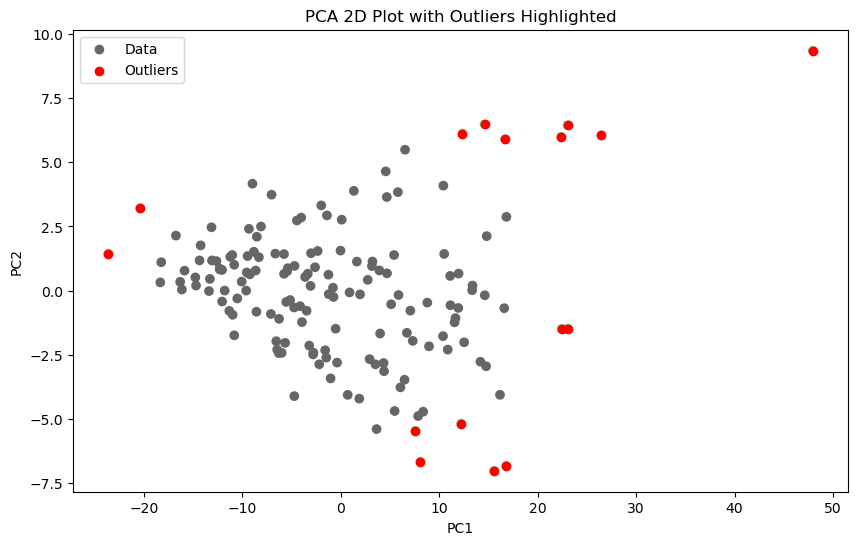

Jumlah PC untuk variasi ≥95%: 2
Jumlah outliers: 15


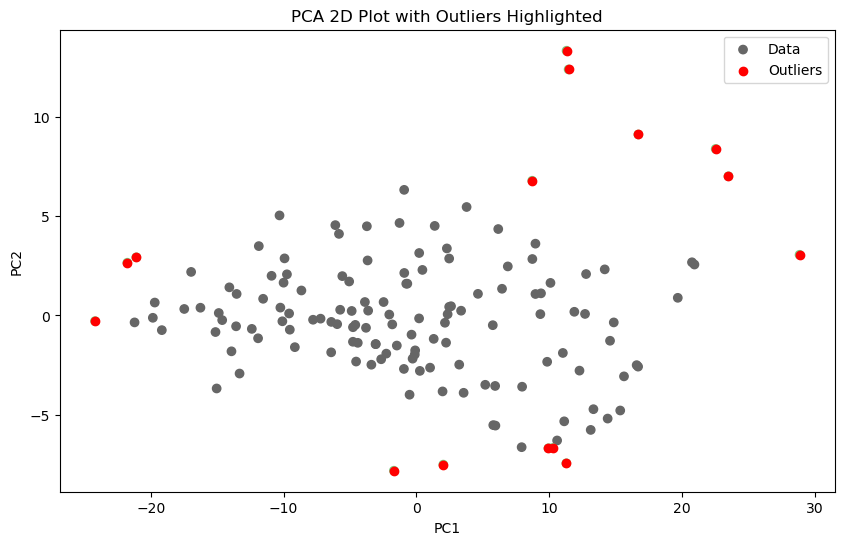

Jumlah PC untuk variasi ≥95%: 2
Jumlah outliers: 12


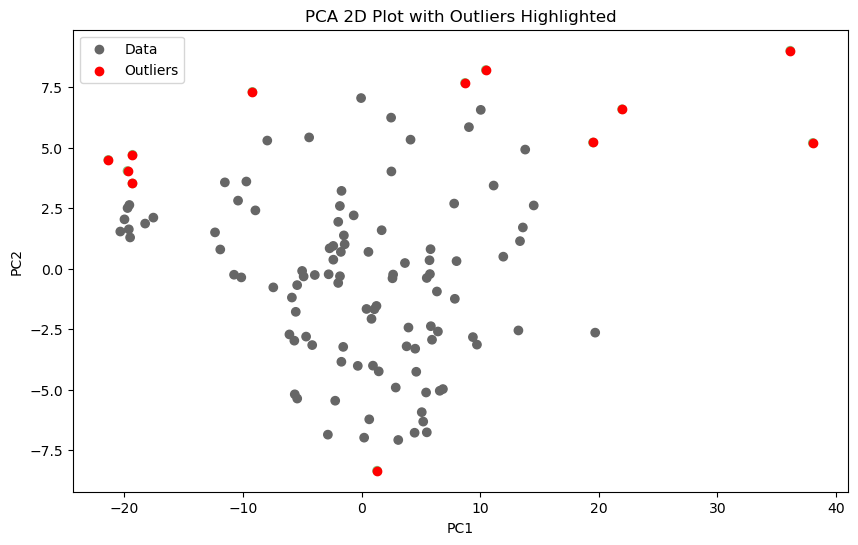

Jumlah PC untuk variasi ≥95%: 2
Jumlah outliers: 16


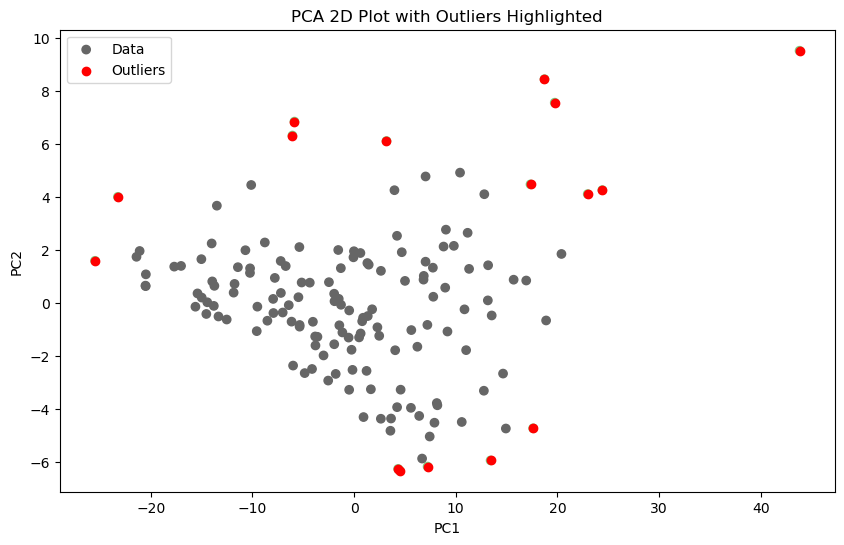

Jumlah PC untuk variasi ≥95%: 2
Jumlah outliers: 16


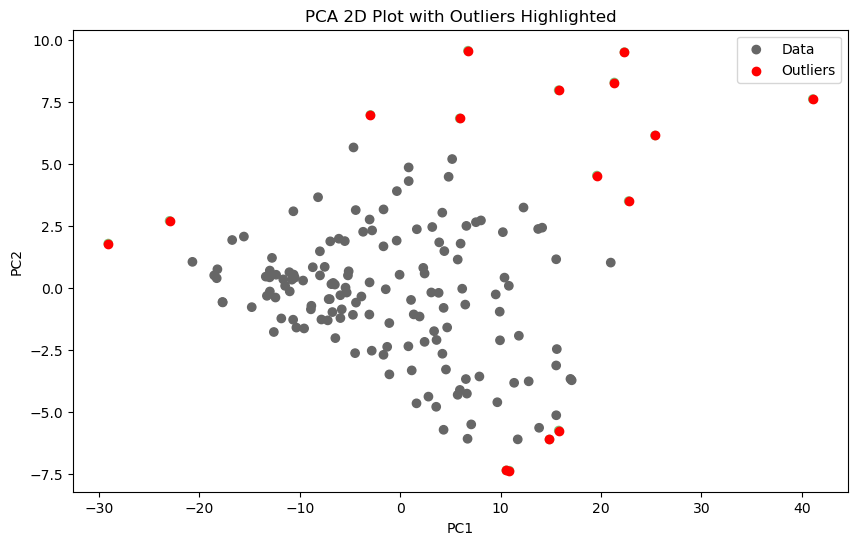

In [7]:
outliers_kadar_air = detect_outliers_pca_mahalanobis(train_data_kadar_air_df,'Kadar Air')
outliers_gula_reduksi = detect_outliers_pca_mahalanobis(train_data_gula_reduksi_df,'Gula Reduksi')
outliers_lemak = detect_outliers_pca_mahalanobis(train_data_lemak_df,'LEMAK')
outliers_protein = detect_outliers_pca_mahalanobis(train_data_protein_df,'PROTEIN')
outliers_fenol = detect_outliers_pca_mahalanobis(train_data_fenol_df,'FENOL')

In [8]:
# import os

output_dir = '../splited_wo_outliers_curated_data_2/basah/nir/kadar_air'
os.makedirs(output_dir, exist_ok=True)
train_data_kadar_air_df_no_outliers = train_data_kadar_air_df[~outliers_kadar_air]
train_data_kadar_air_df_no_outliers.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/kadar_air/cal.csv', index=False)
test_data_kadar_air_df.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/kadar_air/val.csv', index=False)

# output_dir = '../splited_wo_outliers_curated_data_2/basah/nir/gula_reduksi'
# os.makedirs(output_dir, exist_ok=True)
# train_data_gula_reduksi_df_no_outliers = train_data_gula_reduksi_df[~outliers_gula_reduksi]
# train_data_gula_reduksi_df_no_outliers.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/gula_reduksi/cal.csv', index=False)
# test_data_gula_reduksi_df.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/gula_reduksi/val.csv', index=False)


# output_dir = '../splited_wo_outliers_curated_data_2/basah/nir/lemak'
# os.makedirs(output_dir, exist_ok=True)
# train_data_lemak_df_no_outliers = train_data_lemak_df[~outliers_lemak]
# train_data_lemak_df_no_outliers.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/lemak/cal.csv', index=False)
# test_data_lemak_df.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/lemak/val.csv', index=False)


# output_dir = '../splited_wo_outliers_curated_data_2/basah/nir/protein'
# os.makedirs(output_dir, exist_ok=True)
# train_data_protein_df_no_outliers = train_data_protein_df[~outliers_protein]
# train_data_protein_df_no_outliers.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/protein/cal.csv', index=False)
# test_data_protein_df.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/protein/val.csv', index=False)

# output_dir = '../splited_wo_outliers_curated_data_2/basah/nir/fenol'
# os.makedirs(output_dir, exist_ok=True)
# train_data_fenol_df_no_outliers = train_data_fenol_df[~outliers_fenol]
# train_data_fenol_df_no_outliers.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/fenol/cal.csv', index=False)
# test_data_fenol_df.to_csv('../splited_wo_outliers_curated_data_2/basah/nir/fenol/val.csv', index=False)